In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\propietario\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
X = df.drop('koi_disposition', axis=1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use koi_disposition for the y values

In [7]:
y = df['koi_disposition']
target_names = ["confirmed","false positive"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2096,0,0,0,0,4.453424,3.850000e-05,-3.850000e-05,133.090660,0.006350,-0.006350,...,-126,4.269,0.120,-0.120,1.269,0.237,-0.158,291.17328,44.921131,12.938
3882,0,1,0,0,0.752158,2.310000e-07,-2.310000e-07,131.793035,0.000342,-0.000342,...,-175,3.844,0.528,-0.132,2.221,0.496,-1.158,297.10815,42.752918,14.082
4933,0,0,0,0,559.785594,8.732000e-03,-8.732000e-03,433.196600,0.014600,-0.014600,...,-188,4.352,0.101,-0.290,1.111,0.528,-0.142,289.68549,50.409229,13.295
4651,1,0,0,0,22.529070,3.496000e-04,-3.496000e-04,142.249600,0.013900,-0.013900,...,-141,4.594,0.028,-0.149,0.769,0.185,-0.059,289.76526,43.432331,15.607
4965,0,1,0,0,2.709570,4.940000e-07,-4.940000e-07,134.084891,0.000149,-0.000149,...,-125,3.180,0.378,-0.252,5.208,1.807,-2.410,289.70395,51.714401,13.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,1,0,0,0,0.822068,1.980000e-07,-1.980000e-07,132.243022,0.000188,-0.000188,...,-214,3.962,0.350,-0.150,1.921,0.512,-0.704,298.91162,46.586578,13.388
79,0,0,1,1,2.990254,1.170000e-05,-1.170000e-05,171.983400,0.003090,-0.003090,...,-154,4.578,0.048,-0.028,0.731,0.042,-0.063,287.74881,38.929550,15.842
3395,0,0,1,0,1.337562,9.150000e-06,-9.150000e-06,132.145970,0.005380,-0.005380,...,-83,4.056,0.188,-0.101,1.715,0.313,-0.383,291.41714,40.485920,14.217
6346,0,1,0,0,0.721624,1.050000e-07,-1.050000e-07,131.859672,0.000121,-0.000121,...,-151,4.565,0.071,-0.065,0.715,0.087,-0.071,293.59467,42.143082,14.424


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled,y_train)
    test_score = knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k:{k} Training score/Test score: {train_score}/{test_score}")

k:1 Training score/Test score: 1.0/0.8203661327231121
k:3 Training score/Test score: 0.910547396528705/0.8352402745995423
k:5 Training score/Test score: 0.8916650772458516/0.8260869565217391
k:7 Training score/Test score: 0.8764066374213236/0.8369565217391305
k:9 Training score/Test score: 0.8697310699980927/0.8375286041189931
k:11 Training score/Test score: 0.8659164600419607/0.8363844393592678
k:13 Training score/Test score: 0.8622925805836353/0.8409610983981693
k:15 Training score/Test score: 0.8577150486362769/0.8381006864988558
k:17 Training score/Test score: 0.851993133702079/0.8375286041189931
k:19 Training score/Test score: 0.8477970627503337/0.8398169336384439
k:21 Training score/Test score: 0.8451268357810414/0.8386727688787186
k:23 Training score/Test score: 0.8455082967766546/0.834096109839817
k:25 Training score/Test score: 0.8451268357810414/0.8398169336384439
k:27 Training score/Test score: 0.8430288003051688/0.8318077803203662
k:29 Training score/Test score: 0.842838069

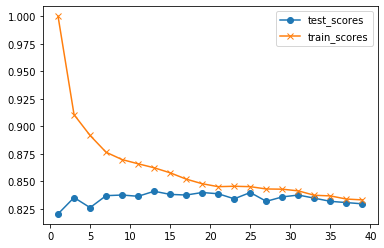

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,40,2), test_scores,marker="o",label="test_scores")
plt.plot(range(1,40,2),train_scores,marker="x",label="train_scores")
plt.legend(loc="upper right")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

In [ ]:
predictions = knn.predict(X_test_scaled)

In [ ]:
import numpy as np
y_test = np.array(y_test)

for x in range(0,5,1):
    print(f"Predictions: {predictions[x]}, Actual: {y_test[x]}")

In [ ]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use GridSearchCV to tune the model's parameters

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1,40,2)
}
grid_knn = GridSearchCV(knn,param_grid)

In [ ]:
knn.get_params().keys()

In [ ]:
# Train the model with GridSearch
grid_knn.fit(X_train_scaled, y_train)

In [ ]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Models/knn.sav'
joblib.dump(grid_knn, filename)